In [6]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv("nywagetheft_construction_2025.xlsx - All.csv")

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Trim whitespace from text columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert date columns (modify names as needed)
date_columns = ["date"]  # Update with actual date column names
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")  # Convert or set to NaT

<ipython-input-6-3c1c23b207fc>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [9]:
# Convert zip_code to string and remove decimals
if "zip_code" in df.columns:
    df["zip_code"] = df["zip_code"].astype(str).str.split(".").str[0]

# Convert company_name to string
if "company_name" in df.columns:
    df["company_name"] = df["company_name"].astype(str)

# Convert date column to proper datetime format (if exists)
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns (text)
        df[col].fillna("Unknown", inplace=True)
    else:  # Numeric columns
        df[col] = pd.to_numeric(df[col], errors="coerce")  # Ensure numeric columns stay numeric
        df[col].fillna(df[col].median(), inplace=True)  # Fill missing numbers with median


<ipython-input-9-319d3216c8d3>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill missing numbers with median
<ipython-input-9-319d3216c8d3>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [10]:
df.head()

,ranking,company_name,industry,city,county,zip_code,date,claimants,wages_stolen
0,1,Solidifi US,Activities Related to Real Estate,Buffalo,Erie County,14210,1404086400000000000,51,64036.08
1,2,NYC Dept. Of Health & Mental Hygiene,Administration of Public Health Programs,Long Island City,Queens County,11101,1674777600000000000,1,3625.00
2,3,Airserv Security c/o American Airlines,Airport Operations,Jamaica,Monroe County,11430,1343952000000000000,1,458.56
3,4,"J.M. Productions, Inc.",All Other Amusement and Recreation Industries,Hamburg,Erie County,14075,1351814400000000000,2,325.50
4,5,Cantalician Center Workshop,All Other Business Support Services,Buffalo,Erie County,14214,1486339200000000000,104,44780.98


In [11]:
print(df.info())  # Get dataset overview
print(df.describe())  # Get summary statistics
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38570 entries, 0 to 38569
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ranking       38570 non-null  int64  
 1   company_name  38570 non-null  object 
 2   industry      38570 non-null  object 
 3   city          38570 non-null  object 
 4   county        38570 non-null  object 
 5   zip_code      38570 non-null  object 
 6   date          38570 non-null  int64  
 7   claimants     38570 non-null  int64  
 8   wages_stolen  38570 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.6+ MB
None
            ranking          date     claimants  wages_stolen
count  38570.000000  3.857000e+04  38570.000000  3.857000e+04
mean   19285.500000  1.482453e+18      9.208452  1.388985e+04
std    11134.344278  1.017622e+17    114.089613  7.822072e+04
min        1.000000  1.325376e+18      1.000000  1.000000e+00
25%     9643.250000  1.398298e+18      1.0

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check column data types
print(df.dtypes)

In [17]:
df['industry'].unique()

array(['Activities Related to Real Estate',
       'Administration of Public Health Programs', 'Airport Operations',
       'All Other Amusement and Recreation Industries',
       'All Other Business Support Services',
       'All Other Consumer Goods Rental',
       'All Other Health and Personal Care Stores',
       'All Other Information Services',
       'All Other Miscellaneous Schools and Instruction',
       'All Other Personal Services',
       'All Other Professional, Scientific, and Technical Services',
       'All Other Support Services',
       'All Other Transit and Ground Passenger Transportation',
       'All Other Wood Product Manufacturing', 'Amusement', 'Apiculture',
       'Apparel',
       'Automotive - All Other Automotive Repair and Maintenance',
       'Automotive - All Other Motor Vehicle Dealers',
       'Automotive - Auto Dealership',
       'Automotive - Automobile and Other Motor Vehicle Merchant Wholesalers',
       'Automotive - Automobile Dealers',
      

In [19]:
# Define the list of construction-related industries
construction_industries = [
    'Construction - All Other Specialty Trade Contractors',
    'Construction - Architectural Services',
    'Construction - Architectural, Engineering, and Related Services',
    'Construction - Building Equipment Contractors',
    'Construction - Building Finishing Contractors',
    'Construction - Building Inspection Services',
    'Construction - Commercial and Institutional Building Construction',
    'Construction - Construction Sand and Gravel Mining',
    'Construction - Drywall and Insulation Contractors',
    'Construction - Electric',
    'Construction - Electrical Contractors and Other Wiring Installation Contractors',
    'Construction - Finish Carpentry Contractors',
    'Construction - Flooring Contractors',
    'Construction - Foundation, Structure, and Building Exterior Contractors',
    'Construction - Framing Contractors', 'Construction - General',
    'Construction - Glass and Glazing Contractors',
    'Construction - Highway, Street, and Bridge Construction',
    'Construction - HVAC',
    'Construction - Industrial Building Construction',
    'Construction - Landscape Architectural Services',
    'Construction - Landscaping',
    'Construction - Landscaping Services',
    'Construction - Masonry Contractors',
    'Construction - New Housing Operative Builders',
    'Construction - New Multifamily Housing Construction (except Operative Builders)',
    'Construction - New Single-Family Housing Construction (except Operative Builders)',
    'Construction - Nonresidential Building Construction',
    'Construction - Other Building Equipment Contractors',
    'Construction - Other Building Finishing Contractors',
    'Construction - Other Foundation, Structure, and Building Exterior Contractors',
    'Construction - Other Heavy and Civil Engineering Construction',
    'Construction - Other Specialty Trade Contractors',
    'Construction - Painting',
    'Construction - Painting and Wall Covering Contractors',
    'Construction - Plumbing',
    'Construction - Plumbing, Heating, and Air-Conditioning Contractors',
    'Construction - Poured Concrete Foundation and Structure Contractors',
    'Construction - Power and Communication Line and Related Structures Construction',
    'Construction - Residential Building Construction',
    'Construction - Residential Remodelers',
    'Construction - Roofing Contractors',
    'Construction - Siding Contractors',
    'Construction - Site Preparation Contractors',
    'Construction - Structural Steel and Precast Concrete Contractors',
    'Construction - Tile and Terrazzo Contractors',
    'Construction - Water and Sewer Line and Related Structures Construction',
    'Construction -General'
]

# Ensure 'industry' column is properly formatted
df["industry"] = df["industry"].str.strip()  # Remove leading/trailing spaces

# Filter only construction-related rows
df_construction = df[df["industry"].isin(construction_industries)]

# Display first few rows to check output
print(df_construction.head())

      ranking                 company_name  \
2540     2541       Smith Restoration Inc.   
2541     2542  Siteworks Contracting Corp.   
2542     2543                  Armor Tower   
2543     2544  Mechanical Energy Solutions   
2544     2545    White & Reader Associates   

                                               industry            city  \
2540  Construction - All Other Specialty Trade Contr...        Brooklyn   
2541  Construction - All Other Specialty Trade Contr...    Mount Vernon   
2542  Construction - All Other Specialty Trade Contr...        Cortland   
2543  Construction - All Other Specialty Trade Contr...         Astoria   
2544  Construction - All Other Specialty Trade Contr...  Central Square   

                  county zip_code                 date  claimants  \
2540        Kings County    11205  1356912000000000000         26   
2541  Westchester County    10553  1591488000000000000         74   
2542     Cortland County    13045  1451520000000000000         16

In [ ]:
# Save the filtered dataset
filtered_file_path = "../data/processed/cleaned_construction_nywagetheft.csv"
df_construction.to_csv(filtered_file_path, index=False)
print(f"Filtered dataset saved as {filtered_file_path}")

Filtered dataset saved as cleaned_construction_wagetheft.csv


In [ ]:
# Save cleaned dataset
#cleaned_file_path = "cleaned_wagetheft.csv"
#df.to_csv(cleaned_file_path, index=False)
#print(f"Cleaned dataset saved to {cleaned_file_path}")

In [21]:
top_companies = df_construction.groupby("company_name")["wages_stolen"].sum().sort_values(ascending=False).head(10)
print(top_companies)


company_name
AGL Industries Inc                           4130507.45
RK Seamless Gutters Inc.                      795964.47
Titan Development                             775000.00
AGL Industries                                742841.88
Danica Group LLC                              710000.00
V & P Altitude Corp                           659460.13
Professional Grade Construction Group Inc     652903.58
Leema Plumbing & Heating, Inc                 520406.00
Groundworks Operations, LLC                   503334.49
Allstate Interiors                            464804.10
Name: wages_stolen, dtype: float64


In [22]:
top_counties = df_construction.groupby("county")["wages_stolen"].sum().sort_values(ascending=False).head(10)
print(top_counties)


county
Queens County         13752992.34
Suffolk County         8921057.31
Kings County           6420582.92
New York County        4841929.48
Nassau County          4598254.42
Westchester County     3523096.87
Richmond County        3140683.70
Bronx County           2608495.42
Erie County            1726698.17
Rockland County        1398620.24
Name: wages_stolen, dtype: float64


In [23]:
industry_counts = df_construction["industry"].value_counts().head(10)
print(industry_counts)


industry
Construction -General                                                              2522
Construction - Landscaping                                                          220
Construction - General                                                               99
Construction - Landscaping Services                                                  68
Construction - Plumbing, Heating, and Air-Conditioning Contractors                   67
Construction - Painting                                                              66
Construction - Commercial and Institutional Building Construction                    55
Construction - All Other Specialty Trade Contractors                                 52
Construction - Electrical Contractors and Other Wiring Installation Contractors      39
Construction - Residential Building Construction                                     37
Name: count, dtype: int64


<ipython-input-25-c01e15db5742>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


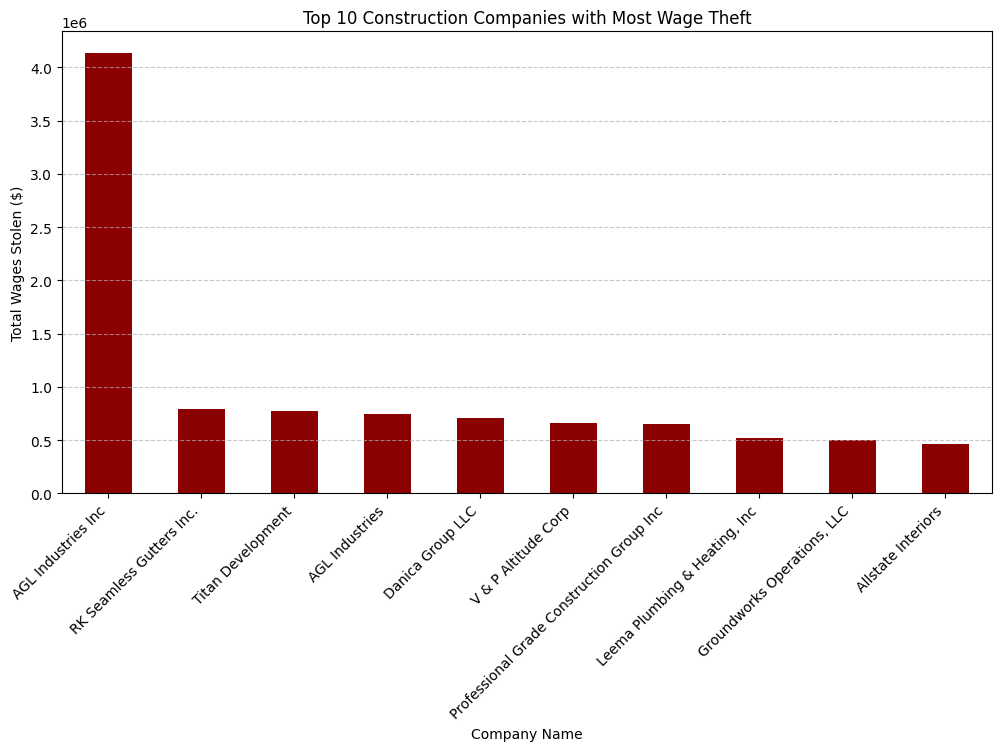

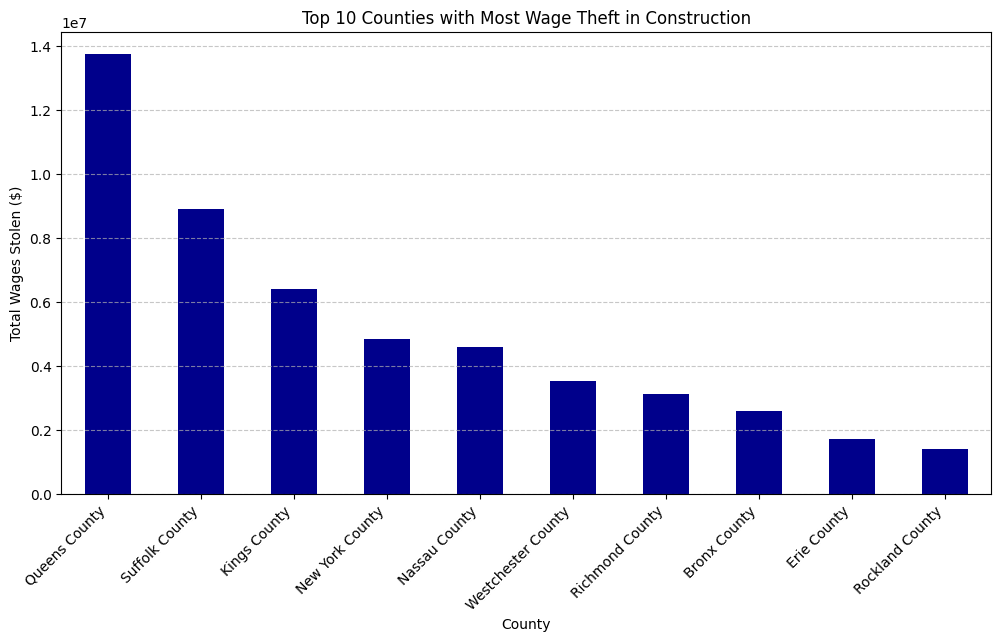

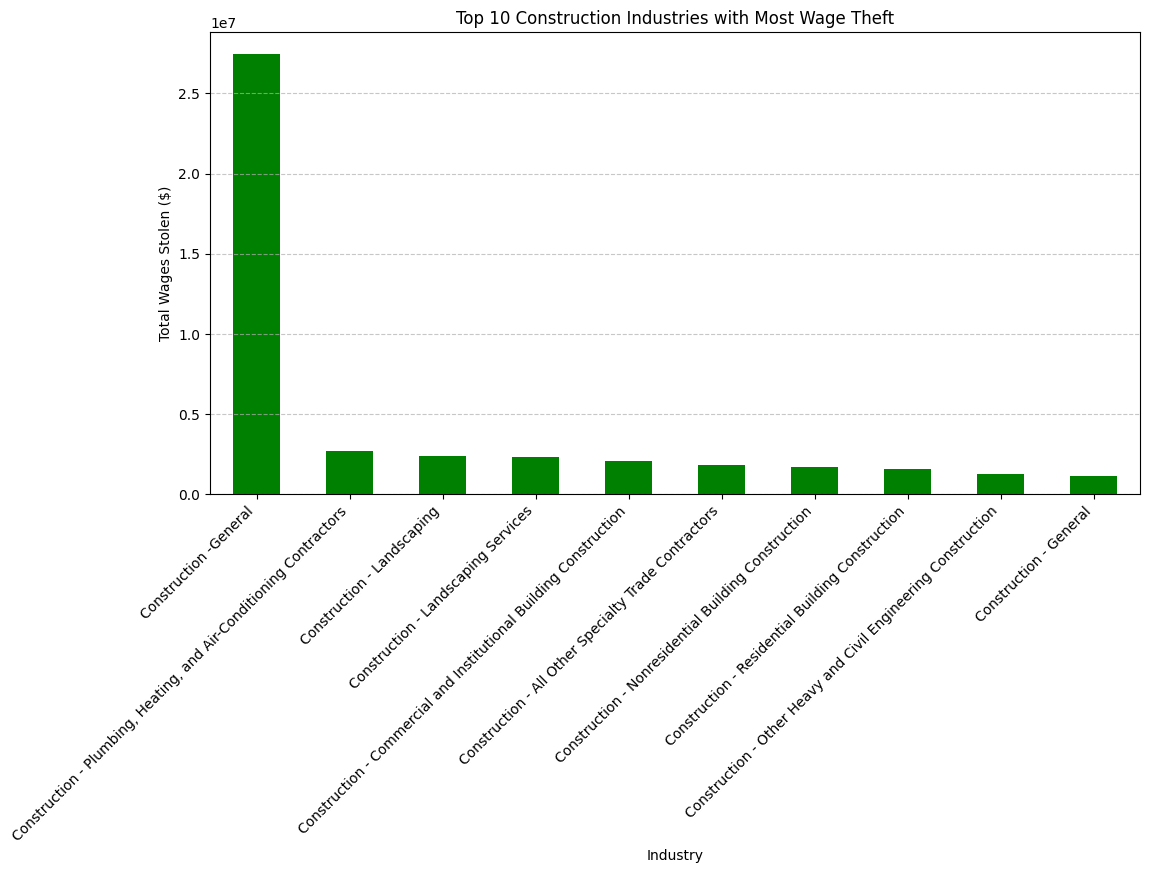

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset (ensure correct file path)
file_path = "cleaned_construction_wagetheft.csv"  # Update if needed
df = pd.read_csv(file_path, dtype=str)

# Convert numeric columns
numeric_columns = ["wages_stolen", "claimants"]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Convert date column if available
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Filter out missing or zero wage theft cases
df = df[df["wages_stolen"] > 0]

### Top 10 Construction Companies with Most Wage Theft
top_companies = df.groupby("company_name")["wages_stolen"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_companies.plot(kind="bar", color="darkred")
plt.title("Top 10 Construction Companies with Most Wage Theft")
plt.xlabel("Company Name")
plt.ylabel("Total Wages Stolen ($)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Top 10 Counties Affected by Wage Theft
top_counties = df.groupby("county")["wages_stolen"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_counties.plot(kind="bar", color="darkblue")
plt.title("Top 10 Counties with Most Wage Theft in Construction")
plt.xlabel("County")
plt.ylabel("Total Wages Stolen ($)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Top 10 Construction Industries Affected
top_industries = df.groupby("industry")["wages_stolen"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_industries.plot(kind="bar", color="green")
plt.title("Top 10 Construction Industries with Most Wage Theft")
plt.xlabel("Industry")
plt.ylabel("Total Wages Stolen ($)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Wage Theft Trend Over Time
if "date" in df.columns and not df["date"].isna().all():
    df["year"] = df["date"].dt.year
    yearly_wage_theft = df.groupby("year")["wages_stolen"].sum()

    plt.figure(figsize=(12, 6))
    yearly_wage_theft.plot(kind="line", marker="o", color="purple")
    plt.title("Wage Theft Trends in Construction Over Time")
    plt.xlabel("Year")
    plt.ylabel("Total Wages Stolen ($)")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

